In [1]:
install.packages('rpart', dependencies=T)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [2]:
library(rpart)

In [3]:
credito = read.csv('Credit.csv')

In [4]:
head(credito)

checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,⋯,'real estate',67,none,own,2,skilled,1,yes,yes,good
0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,⋯,'real estate',22,none,own,1,skilled,1,none,yes,bad
'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,⋯,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,⋯,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,⋯,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,⋯,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good


In [5]:
amostra = sample(c(1,0), 1000, replace=T, prob=c(0.7, 0.3))
credito_treino = credito[amostra==1, ]
credito_teste = credito[amostra==0, ]

In [6]:
arvore = rpart(class ~ ., data=credito_treino, method='class')

In [7]:
print(arvore)

n= 708 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 708 210 good (0.2966102 0.7033898)  
     2) checking_status=<0,0<=X<200 369 171 good (0.4634146 0.5365854)  
       4) duration>=13.5 241 110 bad (0.5435685 0.4564315)  
         8) savings_status=<100,100<=X<500,500<=X<1000 192  76 bad (0.6041667 0.3958333)  
          16) duration>=47.5 23   3 bad (0.8695652 0.1304348) *
          17) duration< 47.5 169  73 bad (0.5680473 0.4319527)  
            34) purpose='domestic appliance','new car',education,other,radio/tv,repairs 94  30 bad (0.6808511 0.3191489)  
              68) employment=<1,1<=X<4,unemployed 66  16 bad (0.7575758 0.2424242) *
              69) employment=>=7,4<=X<7 28  14 bad (0.5000000 0.5000000)  
               138) other_payment_plans=bank 7   1 bad (0.8571429 0.1428571) *
               139) other_payment_plans=none 21   8 good (0.3809524 0.6190476) *
            35) purpose='used car',business,furniture/equipment 75  32 good (0

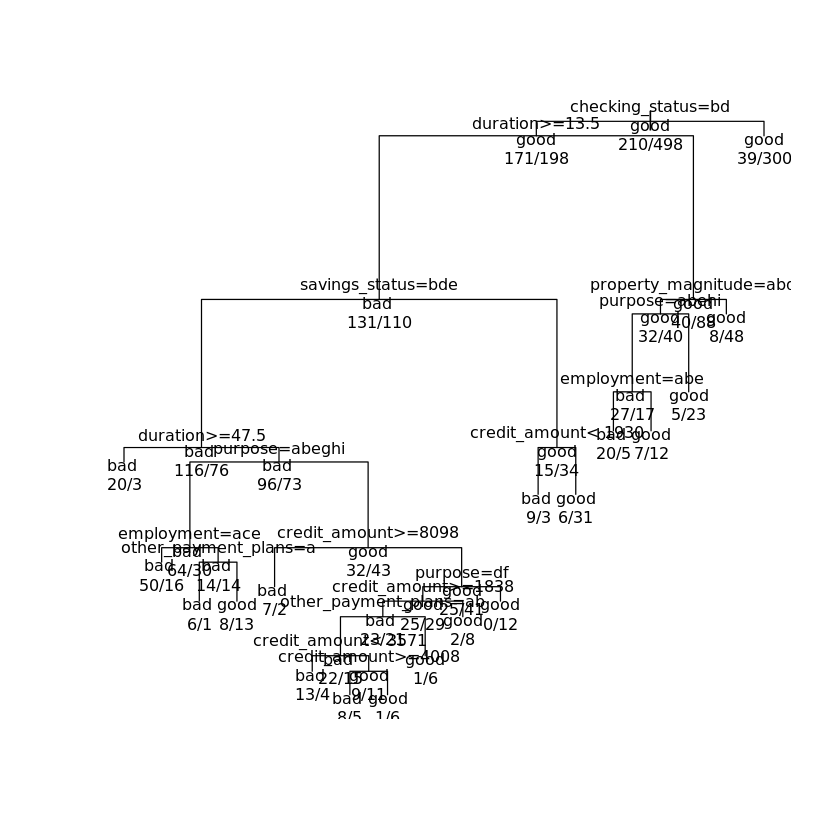

In [8]:
plot(arvore)
text(arvore, use.n=T, all=T, cex=0.8)

In [9]:
teste = predict(arvore, newdata=credito_teste)

In [10]:
teste

,bad,good
1,0.1428571,0.8571429
2,0.8695652,0.1304348
7,0.1150442,0.8849558
12,0.8695652,0.1304348
16,0.7575758,0.2424242
17,0.1150442,0.8849558
19,0.7777778,0.2222222
30,0.8695652,0.1304348
31,0.7500000,0.2500000
38,0.1150442,0.8849558


In [11]:
cred <- cbind(credito_teste, teste)

In [12]:
cred

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,bad,good
1,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,⋯,none,own,2,skilled,1,yes,yes,good,0.1428571,0.8571429
2,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,⋯,none,own,1,skilled,1,none,yes,bad,0.8695652,0.1304348
7,'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,⋯,none,own,1,skilled,1,none,yes,good,0.1150442,0.8849558
12,<0,48,'existing paid',business,4308,<100,<1,3,'female div/dep/mar',none,⋯,none,rent,1,skilled,1,none,yes,bad,0.8695652,0.1304348
16,<0,24,'existing paid',radio/tv,1282,100<=X<500,1<=X<4,4,'female div/dep/mar',none,⋯,none,own,1,'unskilled resident',1,none,yes,bad,0.7575758,0.2424242
17,'no checking',24,'critical/other existing credit',radio/tv,2424,'no known savings',>=7,4,'male single',none,⋯,none,own,2,skilled,1,none,yes,good,0.1150442,0.8849558
19,0<=X<200,24,'existing paid','used car',12579,<100,>=7,4,'female div/dep/mar',none,⋯,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,bad,0.7777778,0.2222222
30,<0,60,'delayed previously',business,6836,<100,>=7,3,'male single',none,⋯,none,own,2,skilled,1,yes,yes,bad,0.8695652,0.1304348
31,0<=X<200,18,'existing paid',business,1913,>=1000,<1,3,'male mar/wid',none,⋯,bank,own,1,skilled,1,yes,yes,good,0.7500000,0.2500000
38,>=200,18,'existing paid',radio/tv,2100,<100,1<=X<4,4,'male single','co applicant',⋯,stores,own,1,skilled,1,none,yes,bad,0.1150442,0.8849558


In [14]:
cred['Result'] = ifelse(cred$bad >= 0.50, 'bad', 'good')

In [15]:
cred

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,bad,good,Result
1,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,⋯,own,2,skilled,1,yes,yes,good,0.1428571,0.8571429,good
2,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,⋯,own,1,skilled,1,none,yes,bad,0.8695652,0.1304348,bad
7,'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,⋯,own,1,skilled,1,none,yes,good,0.1150442,0.8849558,good
12,<0,48,'existing paid',business,4308,<100,<1,3,'female div/dep/mar',none,⋯,rent,1,skilled,1,none,yes,bad,0.8695652,0.1304348,bad
16,<0,24,'existing paid',radio/tv,1282,100<=X<500,1<=X<4,4,'female div/dep/mar',none,⋯,own,1,'unskilled resident',1,none,yes,bad,0.7575758,0.2424242,bad
17,'no checking',24,'critical/other existing credit',radio/tv,2424,'no known savings',>=7,4,'male single',none,⋯,own,2,skilled,1,none,yes,good,0.1150442,0.8849558,good
19,0<=X<200,24,'existing paid','used car',12579,<100,>=7,4,'female div/dep/mar',none,⋯,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,bad,0.7777778,0.2222222,bad
30,<0,60,'delayed previously',business,6836,<100,>=7,3,'male single',none,⋯,own,2,skilled,1,yes,yes,bad,0.8695652,0.1304348,bad
31,0<=X<200,18,'existing paid',business,1913,>=1000,<1,3,'male mar/wid',none,⋯,own,1,skilled,1,yes,yes,good,0.7500000,0.2500000,bad
38,>=200,18,'existing paid',radio/tv,2100,<100,1<=X<4,4,'male single','co applicant',⋯,own,1,skilled,1,none,yes,bad,0.1150442,0.8849558,good


In [16]:
matriz_confusão = table(cred$class, cred$Result)

In [17]:
matriz_confusão

      
       bad good
  bad   43   47
  good  47  155

In [18]:
taxa_acerto = (matriz_confusão[1] + matriz_confusão[4]) / sum(matriz_confusão)

In [19]:
taxa_acerto

[1] 0.6780822

In [20]:
taxa_erro = (matriz_confusão[2] + matriz_confusão[3]) / sum(matriz_confusão)

In [21]:
taxa_erro

[1] 0.3219178